In [1]:
import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from transformers import pipeline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, SimpleRNN, GlobalMaxPool1D

import warnings
warnings.filterwarnings("ignore")
import re
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import xgboost as xgb
import lightgbm as lgb

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, GRU, Dense, Dropout, GlobalMaxPool1D
from tensorflow.keras.callbacks import EarlyStopping



c:\Users\ADMIN\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("depression_dataset_reddit_cleaned.csv")
df.head()


,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


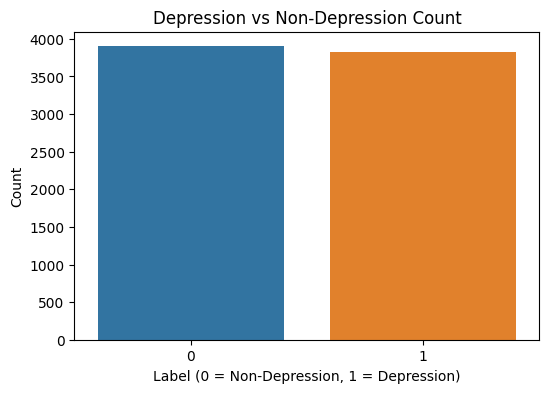

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x=df['is_depression'])
plt.title("Depression vs Non-Depression Count")
plt.xlabel("Label (0 = Non-Depression, 1 = Depression)")
plt.ylabel("Count")
plt.show()


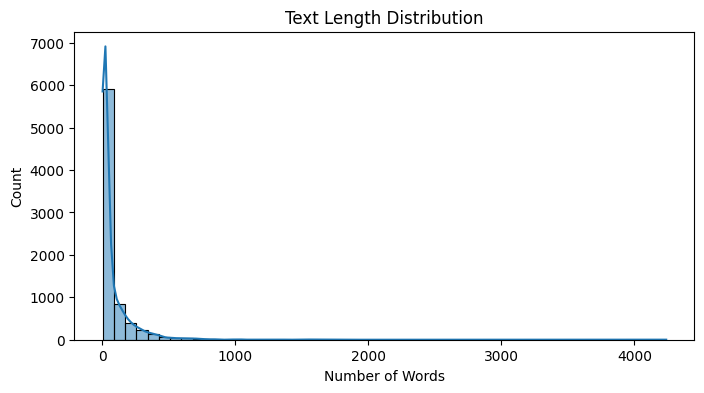

In [23]:
df['text_length'] = df['clean_text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8,4))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title("Text Length Distribution")
plt.xlabel("Number of Words")
plt.show()


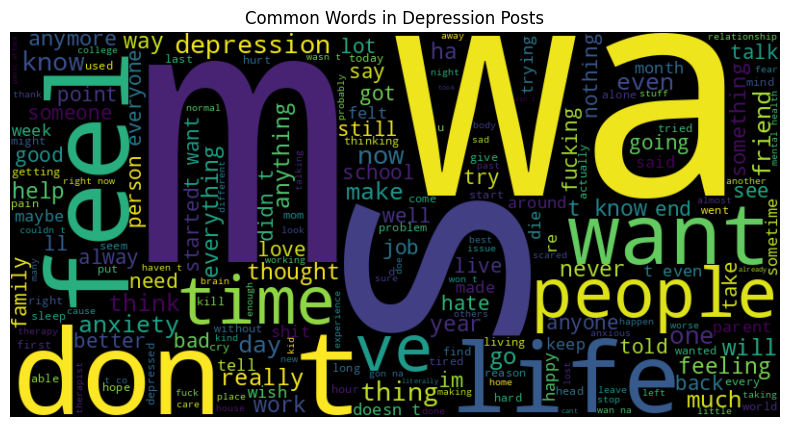

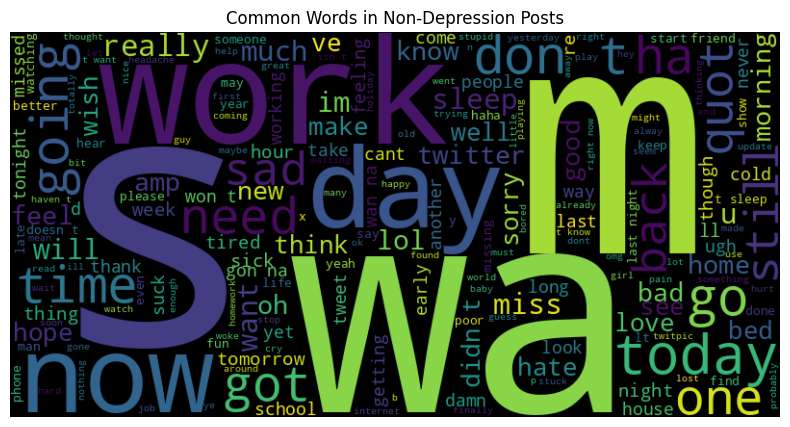

In [24]:
from wordcloud import WordCloud

# Depressed posts
dep_text = " ".join(df[df['is_depression']==1]['clean_text'].astype(str))

wc = WordCloud(width=800, height=400).generate(dep_text)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Common Words in Depression Posts")
plt.show()

# Non-depressed posts
non_text = " ".join(df[df['is_depression']==0]['clean_text'].astype(str))

wc2 = WordCloud(width=800, height=400).generate(non_text)
plt.figure(figsize=(10,5))
plt.imshow(wc2, interpolation='bilinear')
plt.axis("off")
plt.title("Common Words in Non-Depression Posts")
plt.show()


In [3]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", " ", text)
    text = re.sub(r"[^a-z\s]", " ", text)
    return text.strip()

df['clean_text'] = df['clean_text'].apply(clean_text)


In [35]:
X = df['clean_text']
y = df['is_depression']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [36]:
vectorizer = TfidfVectorizer(max_features=10000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [42]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_vec, y_train)

log_reg_preds = log_reg.predict(X_test_vec)
_, log_reg_acc = None, accuracy_score(y_test, log_reg_preds)

log_reg_acc


0.9644473173884939

In [41]:
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

nb_preds = nb.predict(X_test_vec)
_, nb_acc = None, accuracy_score(y_test, nb_preds)

nb_acc


0.8597285067873304

In [40]:

dt = DecisionTreeClassifier()
dt.fit(X_train_vec, y_train)

dt_preds = dt.predict(X_test_vec)
_, dt_acc = None, accuracy_score(y_test, dt_preds)

dt_acc


0.9288946347769877

In [39]:
svm = LinearSVC()
svm.fit(X_train_vec, y_train)

svm_preds = svm.predict(X_test_vec)
_, svm_acc = None, accuracy_score(y_test, svm_preds)

svm_acc


0.967032967032967

In [38]:
rf = RandomForestClassifier()
rf.fit(X_train_vec, y_train)

rf_preds = rf.predict(X_test_vec)
_, rf_acc = None, accuracy_score(y_test, rf_preds)

rf_acc


0.9657401422107305

In [ ]:

for name, model in ml_models.items():
    model.fit(X_train_vec, y_train)
    preds = model.predict(X_test_vec)
    acc = accuracy_score(y_test, preds)
    ml_results.append((name, acc))

ml_results
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=200)
X_test_pad = pad_sequences(X_test_seq, maxlen=200)

cnn = Sequential()
cnn.add(Embedding(10000, 64))
cnn.add(tf.keras.layers.Conv1D(64, 3, activation='relu'))
cnn.add(GlobalMaxPool1D())
cnn.add(Dense(1, activation='sigmoid'))

cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_pad, y_train, epochs=2, batch_size=32, verbose=0)

_, cnn_acc = cnn.evaluate(X_test_pad, y_test, verbose=0)
cnn_acc


0.965093731880188

In [7]:
rnn = Sequential()
rnn.add(Embedding(10000, 64))
rnn.add(SimpleRNN(64))
rnn.add(Dense(1, activation='sigmoid'))

rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn.fit(X_train_pad, y_train, epochs=2, batch_size=32, verbose=0)

_, rnn_acc = rnn.evaluate(X_test_pad, y_test, verbose=0)
rnn_acc


0.97091144323349

In [8]:
lstm = Sequential()
lstm.add(Embedding(10000, 64))
lstm.add(LSTM(64))
lstm.add(Dense(1, activation='sigmoid'))

lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm.fit(X_train_pad, y_train, epochs=2, batch_size=32, verbose=0)

_, lstm_acc = lstm.evaluate(X_test_pad, y_test, verbose=0)
lstm_acc


0.9728506803512573

In [37]:
bilstm_acc = accuracy_score(y_test, bilstm_preds)
bilstm_acc


0.9689722042663219

In [43]:
# XGBoost
xgb_clf = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)
xgb_clf.fit(X_train_tfidf, y_train)
xgb_preds = xgb_clf.predict(X_test_tfidf)
xgb_acc = accuracy_score(y_test, xgb_preds)
xgb_acc


0.9689722042663219

In [44]:
# LightGBM
lgb_clf = lgb.LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
lgb_clf.fit(X_train_tfidf, y_train)
lgb_preds = lgb_clf.predict(X_test_tfidf)
lgb_acc = accuracy_score(y_test, lgb_preds)
lgb_acc


[LightGBM] [Info] Number of positive: 3064, number of negative: 3120
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.183034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105777
[LightGBM] [Info] Number of data points in the train set: 6184, number of used features: 3781
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495472 -> initscore=-0.018112
[LightGBM] [Info] Start training from score -0.018112


0.9702650290885585

In [10]:
# Parameters
NUM_WORDS = 20000
MAX_LEN = 200
EMBED_DIM = 100

tokenizer = Tokenizer(num_words=NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LEN, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LEN, padding='post', truncating='post')


In [11]:
tf.random.set_seed(42)

bilstm = Sequential([
    Embedding(input_dim=NUM_WORDS, output_dim=EMBED_DIM, input_length=MAX_LEN),
    Bidirectional(LSTM(128, return_sequences=False)),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

bilstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)

bilstm.fit(
    X_train_pad, y_train,
    validation_split=0.1,
    epochs=8,
    batch_size=64,
    callbacks=[es],
    verbose=1
)

bilstm_proba = bilstm.predict(X_test_pad, batch_size=256).reshape(-1)
bilstm_preds = (bilstm_proba >= 0.5).astype(int)

# Convert proba to 2-column format for consistency with scikit metrics
bilstm_proba_2col = np.vstack([1 - bilstm_proba, bilstm_proba]).T
eval_model("Bi-LSTM", y_test, bilstm_preds, bilstm_proba_2col)


Epoch 1/8
87/87 [==============================] - 90s 936ms/step - loss: 0.3612 - accuracy: 0.8449 - val_loss: 0.1923 - val_accuracy: 0.9225
Epoch 2/8
87/87 [==============================] - 82s 945ms/step - loss: 0.0891 - accuracy: 0.9702 - val_loss: 0.1243 - val_accuracy: 0.9564
Epoch 3/8
87/87 [==============================] - 76s 875ms/step - loss: 0.0473 - accuracy: 0.9856 - val_loss: 0.1259 - val_accuracy: 0.9532
Epoch 4/8
87/87 [==============================] - 74s 848ms/step - loss: 0.0206 - accuracy: 0.9932 - val_loss: 0.1683 - val_accuracy: 0.9612
Epoch 5/8
87/87 [==============================] - 72s 826ms/step - loss: 0.0120 - accuracy: 0.9953 - val_loss: 0.1846 - val_accuracy: 0.9548
Epoch 5: early stopping
7/7 [==============================] - 7s 635ms/step
Bi-LSTM -> acc: 0.9690, prec: 0.9905, rec: 0.9465, f1: 0.9680, roc_auc: 0.9937


In [ ]:
tf.random.set_seed(42)

gru = Sequential([
    Embedding(input_dim=NUM_WORDS, output_dim=EMBED_DIM, input_length=MAX_LEN),
    GRU(128, return_sequences=False),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
es2 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)

gru.fit(
    X_train_pad, y_train,
    validation_split=0.1,
    epochs=8,
    batch_size=64,
    callbacks=[es2],
    verbose=1
)



gru_proba = gru.predict(X_test_pad, batch_size=256).reshape(-1)
gru_preds = (gru_proba >= 0.5).astype(int)
gru_proba_2col = np.vstack([1 - gru_proba, gru_proba]).T
eval_model("GRU", y_test, gru_preds, gru_proba_2col)
# Choose weights (you can tune via validation)
w_xgb = 0.3
w_lgb = 0.3
w_bilstm = 0.2
w_gru = 0.2

# Ensure probability arrays are aligned: use column for positive class
p_xgb = xgb_proba[:,1]
p_lgb = lgb_proba[:,1]
p_bilstm = bilstm_proba
p_gru = gru_proba

ensemble_proba = (w_xgb * p_xgb) + (w_lgb * p_lgb) + (w_bilstm * p_bilstm) + (w_gru * p_gru)
ensemble_preds = (ensemble_proba >= 0.5).astype(int)
ensemble_proba_2col = np.vstack([1 - ensemble_proba, ensemble_proba]).T

eval_model("Weighted Ensemble", y_test, ensemble_preds, ensemble_proba_2col)





Epoch 1/8
87/87 [==============================] - 40s 402ms/step - loss: 0.6905 - accuracy: 0.6074 - val_loss: 0.6306 - val_accuracy: 0.6026
Epoch 2/8
87/87 [==============================] - 44s 508ms/step - loss: 0.6173 - accuracy: 0.6137 - val_loss: 0.6175 - val_accuracy: 0.6026
Epoch 3/8
87/87 [==============================] - 40s 461ms/step - loss: 0.6078 - accuracy: 0.6296 - val_loss: 0.6177 - val_accuracy: 0.6026
Epoch 4/8
87/87 [==============================] - 33s 384ms/step - loss: 0.6088 - accuracy: 0.6173 - val_loss: 0.6160 - val_accuracy: 0.6026
Epoch 5/8
87/87 [==============================] - 32s 366ms/step - loss: 0.6081 - accuracy: 0.6198 - val_loss: 0.6159 - val_accuracy: 0.6026
Epoch 6/8
87/87 [==============================] - 31s 361ms/step - loss: 0.6059 - accuracy: 0.6214 - val_loss: 0.6174 - val_accuracy: 0.6026
Epoch 7/8
87/87 [==============================] - 39s 438ms/step - loss: 0.5965 - accuracy: 0.6345 - val_loss: 0.5405 - val_accuracy: 0.6947
Epoch 

In [46]:
gru_acc = accuracy_score(y_test, gru_preds)
gru_acc



0.9592760180995475

In [47]:
ensemble_acc = accuracy_score(y_test, ensemble_preds)
ensemble_acc

0.9728506787330317

In [51]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def encode_texts(texts, max_len=128):
    return tokenizer(
        texts.tolist(),
        padding=True,
        truncation=True,
        max_length=max_len,
        return_tensors='tf'
    )


In [53]:
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.layers import Input, Dense, Bidirectional, LSTM, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import numpy as np
import tensorflow as tf


In [ ]:
bert_preds = bert_bilstm_model.predict(
    {"input_ids": test_encodings["input_ids"], "attention_mask": test_encodings["attention_mask"]}
)
bert_preds = (bert_preds > 0.5).astype(int).flatten()
bert_bilstm_acc = accuracy_score(y_test, bert_preds)
print("BERT + BiLSTM Accuracy:", bert_bilstm_acc)


In [ ]:
accuracy_comparison["BERT + BiLSTM"] = bert_bilstm_acc


In [48]:
accuracy_comparison = {
    "Logistic Regression": log_reg_acc,
    "Naive Bayes": nb_acc,
    "SVM": svm_acc,
    "Decision Tree": dt_acc,
    "Random Forest": rf_acc,
    "CNN": cnn_acc,
    "RNN": rnn_acc,
    "LSTM": lstm_acc,
    "Bi-LSTM": bilstm_acc,
    "GRU": gru_acc,
    "XGBoost": xgb_acc,
    "LightGBM": lgb_acc,
    "Weighted Ensemble": ensemble_acc
}

import pandas as pd
df_acc = pd.DataFrame.from_dict(accuracy_comparison, orient='index', columns=['Accuracy'])
display(df_acc)


,Accuracy
Logistic Regression,0.964447
Naive Bayes,0.859729
SVM,0.967033
Decision Tree,0.928895
Random Forest,0.965740
CNN,0.965094
RNN,0.970911
LSTM,0.972851
Bi-LSTM,0.968972
GRU,0.959276


<Figure size 1200x500 with 0 Axes>

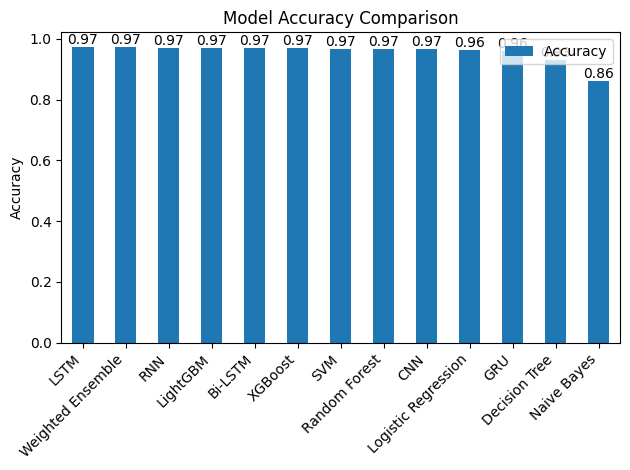

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
df_acc.sort_values('Accuracy', ascending=False).plot(kind='bar')

plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# annotate values
for i, v in enumerate(df_acc.sort_values('Accuracy', ascending=False)['Accuracy']):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')

plt.show()


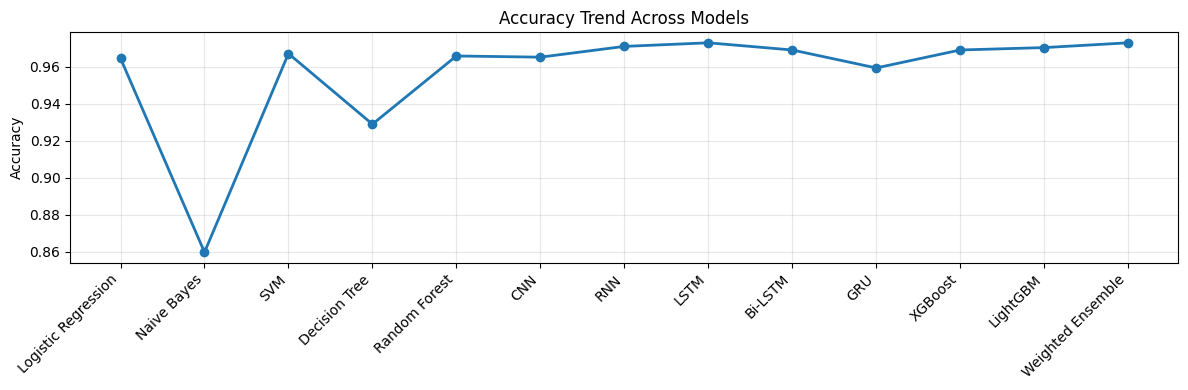

In [50]:
plt.figure(figsize=(12,4))
plt.plot(df_acc.index, df_acc['Accuracy'], marker='o', linewidth=2)
plt.title("Accuracy Trend Across Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
